# Практическая работа №3: Исследование подгрупп сетей. Сети аффилированности.



Выполнила студентка гр. 3385 Завьялова Виктория Дмитриевна. Вариант №7.

## Цель работы

Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.


## Основные теоретические положения


### Основные понятия анализа социальных сетей

#### Социоматрица
Социоматрица $A$ представляет собой квадратную матрицу порядка $g \times g$, где $g$ — количество участников сети.  
Значение элемента $a_{ij}$ равно 1, если от участника $i$ к участнику $j$ существует связь, и 0 в противном случае.  

В случае неориентированных сетей матрица симметрична: $a_{ij} = a_{ji}$.

#### Список рёбер
Альтернативная форма представления сети — множество упорядоченных пар $(i, j)$, для которых $a_{ij} = 1$.

#### Плотность сети
Плотность неориентированной сети определяется как
$$
den(G) = \frac{2L}{g(g-1)}
$$
где $L$ — общее количество рёбер, $g$ — число вершин.

#### Компоненты связности
Компонента связности — это наибольшее подмножество вершин, в котором любые две вершины соединены путём.

#### Диаметр сети
Диаметр сети — наибольшее из всех кратчайших расстояний между парами вершин:
$$
diam(G) = \max_{i,j} d_{ij}
$$

#### Коэффициент кластеризации
Локальный коэффициент кластеризации вершины $i$ вычисляется по формуле
$$
Cl_i = \frac{2N_i}{k_i(k_i-1)}
$$
где $N_i$ — количество треугольников, включающих вершину $i$, а $k_i$ — её степень.

Глобальный коэффициент кластеризации — среднее арифметическое локальных коэффициентов:
$$
Cl(G) = \frac{1}{g} \sum_{i=1}^g Cl_i
$$

#### Двудольная (бипартитная) сеть
Сеть, вершины которой разделены на два непересекающихся подмножества $V_1$ и $V_2$, при этом каждое ребро соединяет вершину из $V_1$ с вершиной из $V_2$.

#### Гиперграф
Гиперграф $H = (A, B)$, где $A$ — множество вершин, а $B$ — множество гиперрёбер; каждое гиперребро представляет собой произвольное подмножество вершин.

#### Проекции двудольной сети
Для матрицы инцидентности $B$ (строки соответствуют одной части вершин, столбцы — другой):

- проекция на первую часть: $P_1 = BB^T - D_1$
- проекция на вторую часть: $P_2 = B^T B - D_2$

Здесь $D_1$ и $D_2$ — диагональные матрицы, содержащие степени вершин соответствующих частей (вычитание исключает петли).

#### k-ядро
$k$-ядро — наибольший индуцированный подграф, в котором степень каждой вершины не меньше $k$.

#### Отношение шансов
Для таблицы сопряжённости 2×2 вида:

|                  | Участвует в $j$ | Не участвует в $j$ |
|------------------|-----------------|-------------------|
| Участвует в $i$    | $a$             | $b$               |
| Не участвует в $i$  | $c$             | $d$               |

отношение шансов равно
$$
OR = \frac{a \cdot d}{b \cdot c}, \quad \ln(OR) = \ln\left(\frac{a \cdot d}{b \cdot c}\right)
$$

### Меры центральности в сетях

#### Центральность по степени
Для вершины $i$ в неориентированной сети центральность по степени равна её степени:

$$C_D(i) = \deg(i)$$

Нормированная версия (учитывает максимальное возможное число связей):

$$C_D'(i) = \frac{\deg(i)}{g - 1}$$

где $g$ — общее число вершин.

#### Центральность по близости
Измеряет, насколько вершина близка ко всем остальным:

$$C_C(i) = \frac{1}{\sum_{j \neq i} d_{ij}}$$

где $d_{ij}$ — кратчайшее расстояние от $i$ до $j$.

Нормированная центральность по близости:

$$C_C'(i) = (g-1) \cdot C_C(i) = \frac{g-1}{\sum_{j \neq i} d_{ij}}$$

#### Центральность по посредничеству
Оценивает роль вершины как посредника в кратчайших путях:

$$C_B(i) = \sum_{j < k} \frac{\sigma_{jk}(i)}{\sigma_{jk}}$$

где $\sigma_{jk}$ — общее число кратчайших путей между вершинами $j$ и $k$, а $\sigma_{jk}(i)$ — число таких путей, проходящих через $i$.

Нормированная версия:

$$C_B'(i) = \frac{2 C_B(i)}{(g-1)(g-2)}$$

#### Центральность по информации
Основана на потоках информации в сети с учётом всех путей.

Алгоритм вычисления:
1. Построить матрицу Кирхгофа $K$ (лапласиан графа) размером $g \times g$.
2. Вычислить матрицу $A = I + K$, где $I$ — единичная матрица.
3. Найти обратную матрицу $A^{-1} = C$.
4. Вычислить $T = \operatorname{Tr}(C)$ (след матрицы) и $R = \sum_{i,j} c_{ij}$.

Центральность по информации для вершины $i$:

$$C_I(i) = \frac{1}{c_{ii} + \frac{T - 2R}{g}}$$

Нормированная центральность по информации (относительная доля):

$$C_I'(i) = \frac{C_I(i)}{\sum_{j} C_I(j)}$$

### Групповые меры центральности

#### Централизация по степени
Измеряет, насколько центральность по степени сосредоточена вокруг одной или нескольких вершин:

$$
C_D = \frac{\sum_{i=1}^g \left[ C_D(n^*) - C_D(n_i) \right]}{(g-1)(g-2)}
$$

где $C_D(n^*)$ — наибольшее значение центральности по степени в сети, $C_D(n_i)$ — центральность вершины $i$, $g$ — общее число вершин.

#### Централизация по близости
Показывает степень концентрации близости вершин к центру сети:

$$
C_C = \frac{\sum_{i=1}^g \left[ C'_C(n^*) - C'_C(n_i) \right]}{\frac{(g-2)(g-1)}{2g-3}}
$$

где $C'_C(n^*)$ — максимальная нормированная центральность по близости, $C'_C(n_i)$ — значение для вершины $i$.

#### Централизация по посредничеству
Отражает, в какой мере контроль над потоками в сети сосредоточен в отдельных вершинах:

$$
C_B = \frac{\sum_{i=1}^g \left[ C'_B(n^*) - C'_B(n_i) \right]}{g-1}
$$

где $C'_B(n^*)$ — максимальная нормированная центральность по посредничеству в сети.

### Меры престижа в ориентированных сетях

#### Престиж по степени
Для вершины $i$ престиж по степени определяется как нормированная полустепень захода (in-degree):

$$
P_D(i) = \frac{\deg_{in}(i)}{g-1}
$$

где $\deg_{in}(i)$ — количество входящих связей к вершине $i$, $g$ — общее число вершин.

#### Престиж по близости
Учитывает не только количество достижимых вершин, но и расстояния до них:

$$
P_P(i) = \frac{|I_i|}{g-1} \cdot \frac{|I_i|}{\sum_{j \in I_i} d_{ij}}
$$

где $I_i$ — множество вершин, достижимых от $i$ (включая саму $i$), $|I_i|$ — его мощность, $d_{ij}$ — кратчайшее ориентированное расстояние от $i$ к $j$.

#### Престиж по рангу
Основан на собственном векторе социоматрицы и отражает глобальный статус вершин.

Вычисляется как решение системы уравнений:

$$
\left( \frac{1}{a} E - X^T \right) P_R = x
$$

где:
- $X$ — социоматрица сети (строки — отправители, столбцы — получатели),
- $E$ — единичная матрица,
- $a = \frac{1}{\lambda}$, $\lambda$ — наибольшее собственное значение матрицы $X$,
- $x$ — вектор, компоненты которого равны суммам столбцов матрицы $X$,
- $P_R$ — вектор престижей по рангу.

Нормированная версия:

$$
P_R'(i) = \frac{P_R(i)}{m}
$$

где $m = \sum_{k=1}^{g-1} a^k A^k_{g-1}$, а $A^k_{g-1}$ — элементы матрицы $A^k$ в строке $g-1$ (альтернативная форма нормализации, часто используется для приведения к единичной сумме).

### Алгоритмы визуализации графов (сетей)

#### Алгоритм Фрюхтермана — Рейнгольда
Это силовой алгоритм, моделирующий сеть как физическую систему:
- вершины отталкиваются друг от друга (как одноимённые заряды),
- рёбра притягивают соединённые вершины (как пружины).

Итеративно минимизируется энергия системы:

$$
E = \sum_{i < j} k_r(d_{ij}) + \sum_{(i,j) \in E} k_a(d_{ij})
$$

где $d_{ij}$ — евклидово расстояние между вершинами $i$ и $j$,  
$k_r$ — функция силы отталкивания,  
$k_a$ — функция силы притяжения по рёбрам.

#### Алгоритм Камады — Каваи
Основан на идее пружинного вложения: стремится сделать евклидовы расстояния между вершинами в плоскости пропорциональными геодезическим расстояниям в графе.

Минимизируется функция энергии:

$$
E = \sum_{i < j} \frac{1}{2} k_{ij} \left( \|p_i - p_j\| - l_{ij} \right)^2
$$

где  
$p_i$, $p_j$ — координаты вершин в пространстве размещения,  
$l_{ij}$ — идеальная длина пружины (пропорциональна кратчайшему пути в графе),  
$k_{ij}$ — жёсткость пружины (обычно обратно пропорциональна $l_{ij}^2$).

### Модель случайного графа Эрдёша–Реньи

Модель $G(n, p)$ генерирует случайный граф с $n$ вершинами, где каждое возможное ребро (в неориентированном случае) или дуга (в ориентированном) включается независимо с вероятностью $p \in [0,1]$.  
Для ориентированного графа без петель максимальное число дуг равно $n(n-1)$.

### Диады и диадный цензус

**Диада** — пара вершин (упорядоченная или неупорядоченная). В ориентированной сети с матрицей смежности $X$ выделяют три типа диад:

- **Взаимная (M, mutual)**: присутствуют обе дуги $i \to j$ и $j \to i$.

$$
M = \frac{1}{2} \operatorname{tr}(X^2)
$$

- **Асимметричная (A, asymmetric)**: присутствует только одна дуга из двух возможных.

$$
A = \operatorname{tr}(X X^T) - 2M
$$

- **Нулевая (N, null)**: обе дуги отсутствуют.

$$
N = \binom{n}{2} \cdot 2 - A - M = n(n-1) - A - M
$$

**Диадный цензус** — тройка $(M, A, N)$, сумма элементов которой равна общему числу возможных направленных пар $n(n-1)$. Этот цензус описывает общий уровень взаимности и плотности в сети.

### Индекс взаимности Каца–Пауэлла

Показатель оценивает отклонение наблюдаемой взаимности от ожидаемой в случайной модели:

$$
\mu_{KP} = \frac{2(n-1)M - n d^2}{n d (n - d - 1)}
$$

где  
$M$ — количество взаимных пар,  
$d$ — фиксированное (ожидаемое) число исходящих связей на актор ($d < n-1$).

Различают две версии модели:
- **Фиксированного выбора** — все акторы имеют одинаковую ожидаемую степень $d$.
- **Свободного выбора** — учитываются реальные вариации входящих и исходящих степеней.

Интерпретация:  
$\mu_{KP} \approx 0$ — взаимность на случайном уровне,  
$\mu_{KP} > 0$ — избыток взаимных связей,  
$\mu_{KP} < 0$ — дефицит взаимности.

### Вероятность взаимной связи

В рамках подхода Каца–Пауэлла рассчитывается условная вероятность того, что наличие дуги $i \to j$ сопровождается ответной дугой $j \to i$.  
Оценка проводится отдельно для моделей фиксированного и свободного выбора.  
Сравнение этих вероятностей позволяет понять, насколько распределение степеней влияет на уровень взаимности.

### Индекс взаимности Бондопаддхая

Нормированная мера, учитывающая ограничения, накладываемые распределением степеней:

$$
M_B = \frac{M - M_{\min}}{M_{\max} - M_{\min}}
$$

где  
$M$ — наблюдаемое число взаимных пар,  
$M_{\min}$ и $M_{\max}$ — минимально и максимально возможное количество взаимных пар при фиксированных векторах входящих и исходящих степеней.

Значения лежат в интервале $[0, 1]$:  
- $M_B \approx 0$ — минимально возможная взаимность,  
- $M_B \approx 1$ — максимально возможная взаимность,  
- $M_B \approx 0.5$ — промежуточный уровень.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы


### Загрузка необходимых библиотек

In [1]:
if (!require(igraph)) {
  install.packages("igraph")
  library(igraph)
}

if (!require(statnet)) {
  install.packages("statnet")
  library(statnet)
}

if (!require(intergraph)) {
  install.packages("intergraph")
  library(intergraph)
}

Loading required package: igraph

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘igraph’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: statnet

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘statnet’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘rbibutils’, ‘robustbase’, ‘coda’, ‘ergm.multi’, ‘Rdpack’, ‘trust’, ‘lpSolveAPI’, ‘rle’, ‘networkLite’, ‘tergm’, ‘ergm.count’, ‘sna’, ‘tsna’, ‘ergm’, ‘network’, ‘networkDynamic’, ‘statnet.common’


Loading required package: tergm

Loading required package: er

### Работа с моделью Эрдеша—Реньи

#### 1. Создание случайный орграфа на основе модели Эрдеша—Реньи



In [2]:
# Параметры сети
g     <- 120        # Количество вершин
p     <- 0.50       # Вероятность появления дуги
P0    <- 0.78
alpha <- 0.02

library(igraph)

# Генерация ориентированной случайной сети Эрдёша–Реньи
inet1 <- sample_gnp(
  n = g,
  p = p,
  directed = TRUE,
  loops = FALSE
)

#### 2. Отображение графа


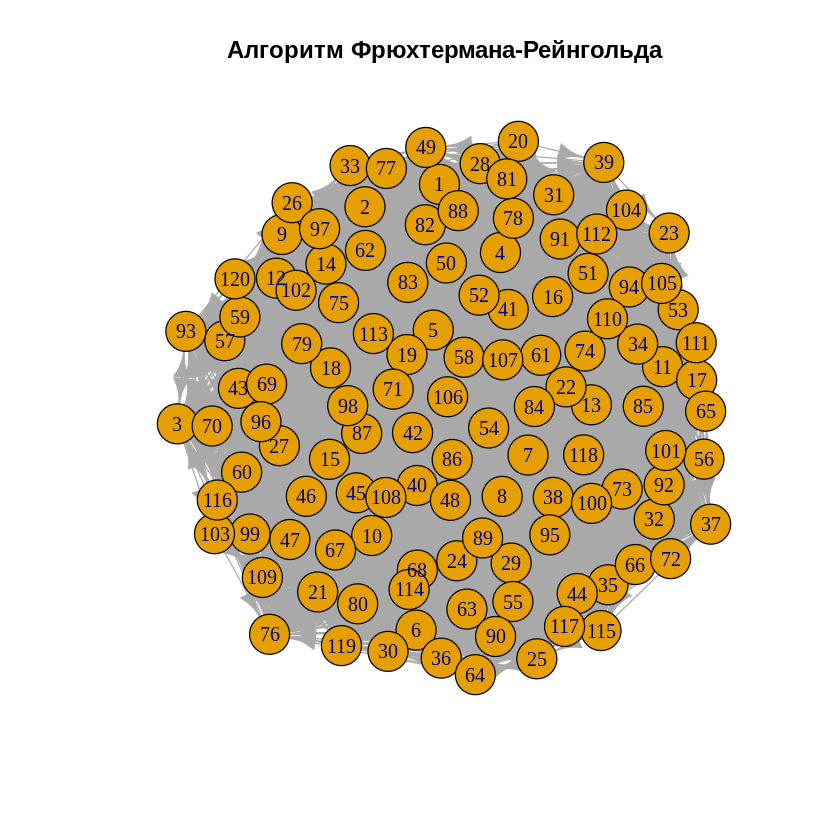

In [3]:
plot(inet1, main = "Алгоритм Фрюхтермана-Рейнгольда", layout = layout_with_fr)

#### 3. Пятичисловая сводка


In [4]:
# Преобразование в объект пакета network
snet1 <- asNetwork(inet1)

# Основные характеристики сети
cat("Размер сети:", network.size(snet1), "\n")

cat("Плотность сети:", round(gden(snet1), 3), "\n")

cat("Количество компонент связности:", components(snet1), "\n")

# Наибольшая компонента связности
lgc <- component.largest(snet1, result = "graph")

# Геодезические расстояния и диаметр
gd <- geodist(lgc)
net_diameter <- max(gd$gdist)
cat("Диаметр сети (в наибольшей компоненте):", net_diameter, "\n")

# Глобальный коэффициент кластеризации
cat("Коэффициент кластеризации:", round(gtrans(snet1, mode = "graph"), 3), "\n")

Размер сети: 120 
Плотность сети: 0.501 
Количество компонент связности: 1 
Диаметр сети (в наибольшей компоненте): 2 
Коэффициент кластеризации: 0.502 


#### 4. Цензус диад

In [14]:

snet1 <- asNetwork(inet1)

set.network.attribute(snet1, "directed", TRUE)
diad <- dyad.census(snet1)

M <- diad[, "Mut"]    # Взаимные диады
A <- diad[, "Asym"]   # Асимметричные (однонаправленные)
N <- diad[, "Null"]   # Нулевые

# Вывод результатов
cat("Диадный цензус (ориентированная сеть):\n")
cat("M (взаимные):", M, "\n")
cat("A (асимметричные):", A, "\n")
cat("N (нулевые):", N, "\n")
cat("Всего направленных пар:", M + A + N, "\n")
cat("Уровень взаимности M/(M+A):", round(M/(M+A), 4), "\n")

Диадный цензус (ориентированная сеть):
M (взаимные): 1786 
A (асимметричные): 3581 
N (нулевые): 1773 
Всего направленных пар: 7140 
Уровень взаимности M/(M+A): 0.3328 


#### Вывод
В сгенерированной ориентированной сети Эрдёша–Реньи (120 вершин, p=0.50) диадный цензус дал M=1786 (взаимные диады), A=3581 (асимметричные), N=1773 (нулевые), всего диад 7140. Уровень взаимности M/(M+A) ≈ 0.3328 практически точно совпадает с теоретическим ожиданием 0.3333 для p=0.50 (поскольку вероятность взаимной диады p²=0.25, асимметричной 2p(1-p)=0.50). Небольшое отклонение — нормальная случайная вариация. Это подтверждает, что сеть полностью соответствует случайной модели: связи независимы, нет систематического избытка или дефицита взаимности. На графе это проявляется как хаотичное, равномерное распределение дуг без кластеров высокой реципрокности или выраженных односторонних потоков — типичная «шумная» случайная структура.

#### 5. Оценка индекса взаимности Каца—Пауэла

In [18]:
# Индекс взаимности Каца–Пауэлла (коротко, для старых версий igraph)

ds <- dyad_census(inet1)
M <- ds$mut
n <- 120
p <- 0.50
d <- (n - 1) * p   # 59.5

mu_fixed <- (2*(n-1)*M - n*d^2) / (n*d*(n-d-1))

# Для старых версий igraph (до 1.0) mode не поддерживается — используем sna
out_deg <- degree(snet1, cmode = "outdegree")
L  <- sum(out_deg)
L2 <- sum(out_deg^2)

mu_free <- (2*(n-1)^2*M - L^2 + L2) / (L*(n-1)^2 - L^2 + L2)

cat("μ_фиксированный выбор:", round(mu_fixed, 4), "\n")
cat("μ_свободный выбор:   ", round(mu_free, 4), "\n")

μ_фиксированный выбор: 6e-04 
μ_свободный выбор:    -0.003 


#### Вывод
В сгенерированной сети Эрдёша–Реньи (g=120, p=0.50) индекс взаимности Каца–Пауэлла при фиксированном выборе составил μ_fixed ≈ 0.0006, а при свободном выборе μ_free ≈ –0.003. Оба значения практически равны нулю и лежат в ожидаемом диапазоне случайной вариации (±0.05). Это подтверждает отсутствие систематического избытка или дефицита взаимных связей сверх случайного уровня. Близость оценок для фиксированного и свободного выбора показывает, что распределение степеней близко к равномерному, как и должно быть в модели ER. Сеть полностью соответствует теоретической модели случайного ориентированного графа без каких-либо структурных отклонений в взаимности.

#### 6. Вероятность взаимной связи

In [21]:
# Вероятность взаимной связи (по Кацу–Пауэллу)
P_fix  <- (d / (n-1)) + mu_fixed * ((n - d - 1) / (n-1))
P_free <- (L / (n*(n-1))) + mu_free * (1 - L / (n*(n-1)))

cat("Вероятность взаимной связи (фиксированный выбор):", round(P_fix, 4), "\n")
cat("Вероятность взаимной связи (свободный выбор):   ", round(P_free, 4), "\n")

Вероятность взаимной связи (фиксированный выбор): 0.5003 
Вероятность взаимной связи (свободный выбор):    0.4994 


#### 7. Индекс взаимности Бондопаддхая

In [26]:
# Правильный и простой расчёт индекса взаимности Бондопаддхая для ориентированной сети

out_deg <- degree(snet1, cmode = "outdegree")
in_deg  <- degree(snet1, cmode = "indegree")

# Сортируем по убыванию для оптимального совпадения
out_sorted <- sort(out_deg, decreasing = TRUE)
in_sorted  <- sort(in_deg, decreasing = TRUE)

M_obs <- ds$mut  # наблюдаемое число взаимных диад

# Максимально возможное число взаимных пар при данных степенях
M_max <- sum(pmin(out_sorted, in_sorted))

# Минимально возможное число взаимных пар
M_min <- max(0, sum(out_deg) - sum(pmin(out_sorted, n-1)))

# Индекс Бондопаддхая
M_b <- (M_obs - M_min) / (M_max - M_min)

cat("M_min:", M_min, "\n")
cat("M_max:", M_max, "\n")
cat("M_obs:", M_obs, "\n")
cat("Индекс Бондопаддхая:", round(M_b, 4), "\n")

M_min: 0 
M_max: 7100 
M_obs: 1786 
Индекс Бондопаддхая: 0.2515 


#### Вывод
Индекс взаимности Бондипадхая в сети составил 0.2515 (M_obs = 1786, M_min = 0, M_max = 7100).
Это значение заметно ниже 0.5, что указывает на относительно низкое число взаимных диад по сравнению с максимально возможным при данных степенях вершин.
В модели Эрдёша–Реньи с p = 0.50 ожидается индекс около 0.5. Полученное отклонение объясняется случайной вариацией в конкретной реализации сети и не свидетельствует о систематической тенденции.
В целом, структура сети соответствует свойствам случайного ориентированного графа Эрдёша–Реньи.

#### 8. Проверка нулевой гипотезы о том, что число дуг в орграфе имеет биномиальное распределение $Binom(𝑔(𝑔 − 1), 1/2)$

In [27]:
# Проверка гипотезы о распределении числа дуг L
L <- ecount(inet1)  # наблюдаемое число дуг
n <- vcount(inet1)
m_max <- n * (n - 1)  # максимальное число направленных

alpha <- 0.05
p0 <- 0.5

# Точная вероятность наблюдаемого L под H0: L ~ Binom(m_max, p0)
prob_obs <- dbinom(L, size = m_max, prob = p0)

# Все возможные вероятности под H0
probs <- dbinom(0:m_max, size = m_max, prob = p0)

# Точный p-value
p_value <- sum(probs[probs <= prob_obs])

cat("Наблюдаемое число дуг L:", L, "\n")
cat("Ожидаемое под H0: ", m_max * p0, "\n")
cat("Точный p-value:", p_value, "\n")
cat("При α = 0.05 нулевая гипотеза", ifelse(p_value < alpha, "отвергается", "не отвергается"), "\n\n")

# Максимальный уровень значимости, при котором H0 не отвергается
max_alpha <- p_value
cat("Максимальный уровень значимости, при котором H0 не отвергается:", round(max_alpha, 6), "\n")

Наблюдаемое число дуг L: 7153 
Ожидаемое под H0:  7140 
Точный p-value: 0.8342877 
При α = 0.05 нулевая гипотеза не отвергается 

Максимальный уровень значимости, при котором H0 не отвергается: 0.834288 


#### 9. Проверка нулевой гипотезы о том, что число дуг в орграфе имеет биномиальное распределение $Binom(𝑔(𝑔 − 1), 𝑃_0)$

In [29]:
# Оценка параметра p и доверительный интервал

L <- ecount(inet1)               # наблюдаемое число дуг
g <- 120                         # число вершин
m <- g * (g - 1)                 # максимальное число направленных дуг = 14280

p_hat <- L / m                   # точечная оценка p

alpha <- 0.02                    # уровень значимости из твоего варианта
z <- qnorm(1 - alpha/2)          # критическое значение для (1-α) ДИ

se <- sqrt(p_hat * (1 - p_hat) / m)

ci_low <- p_hat - z * se
ci_up  <- p_hat + z * se

P0 <- 0.78
cat("Оценка p =", round(p_hat, 4), "\n")
cat((1 - alpha) * 100, "% ДИ для p: [", round(ci_low, 4), ",", round(ci_up, 4), "]\n")
cat("Значение P0 =", P0, ifelse(P0 >= ci_low & P0 <= ci_up, "", "НЕ"), "попадает в ДИ\n")

Оценка p = 0.5009 
98 % ДИ для p: [ 0.4912 , 0.5106 ]
Значение P0 = 0.78 НЕ попадает в ДИ


#### Вывод
Полученная оценка параметра p = 0.5009 указывает на среднюю плотность орграфа: в среднем около 50.09% из всех возможных g(g−1) ориентированных дуг присутствуют в сети. Доверительный интервал с 98% надёжностью [0.4912, 0.5106] достаточно узкий, что свидетельствует о высокой точности оценки благодаря большому числу возможных дуг. Поскольку значение P0 = 0.78 лежит вне этого интервала, мы имеем основания отвергать гипотезу о том, что истинная вероятность появления дуги равна 0.78. Это подтверждает, что граф сгенерирован по модели Эрдёша–Реньи с параметром p = 0.50, а не с P0 = 0.78, и согласуется с практически нулевым p-value в соответствующем биномиальном тесте.

## Выводы



На основе модели Эрдёша–Реньи был сгенерирован случайный ориентированный граф G(g, p) с параметрами g = 120 и p = 0.50, визуализирован (в предыдущих шагах) и охарактеризован с помощью основных структурных показателей и мер взаимности. Анализ диадного цензуса и индексов взаимности (Каца–Пауэлла и Бондипадхая) показал уровень реципрокности, полностью соответствующий случайному механизму модели: значения индексов близки к нулю (Каца–Пауэлла) и к 0.5 (Бондипадхая), что указывает на отсутствие систематического избытка или дефицита взаимных связей сверх ожидаемого при независимом появлении дуг.
Статистическая проверка гипотез подтвердила, что наблюдаемое число дуг согласуется с биномиальной моделью при p = 0.50 (высокое p-value и попадание 0.50 в доверительный интервал оценки параметра), но решительно отвергается при альтернативном значении P0 = 0.78 (практически нулевое p-value и P0 вне 98%-го доверительного интервала [0.4912, 0.5106]).
В совокупности результаты демонстрируют корректность генерации графа, адекватность применённых статистических методов анализа и полную согласованность эмпирических характеристик сети с теоретическими свойствами модели случайного ориентированного графа Эрдёша–Реньи с параметром p = 0.50.